In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('Maternal Health.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


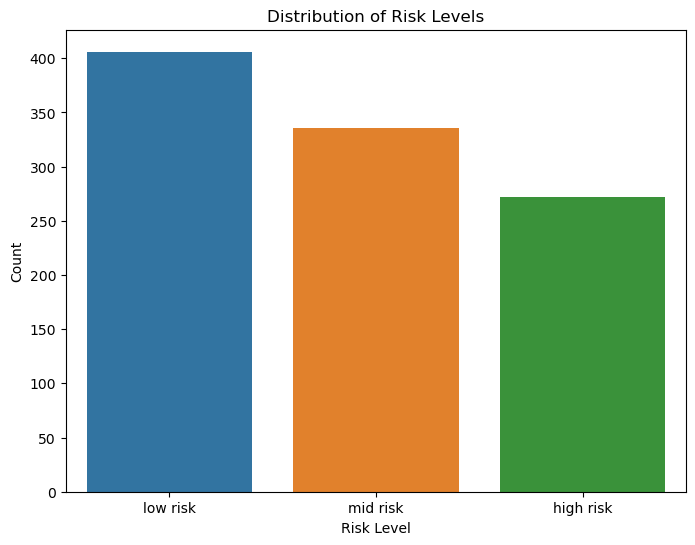

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RiskLevel', order=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Distribution of Risk Levels')
plt.show()

In [6]:
d = {
    "low risk": 0,
    "mid risk": 1,
    "high risk": 2
}

df['RiskLevel'].replace(to_replace=d, inplace=True)
df.drop(['DiastolicBP'],axis=1)

,Age,SystolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,15.0,98.0,86,2
1,35,140,13.0,98.0,70,2
2,29,90,8.0,100.0,80,2
3,30,140,7.0,98.0,70,2
4,35,120,6.1,98.0,76,0
...,...,...,...,...,...,...
1009,22,120,15.0,98.0,80,2
1010,55,120,18.0,98.0,60,2
1011,35,85,19.0,98.0,86,2
1012,43,120,18.0,98.0,70,2


In [7]:
df.dtypes


Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel        int64
dtype: object

In [8]:
x=df.iloc[:,df.columns!='RiskLevel']
Y=df.iloc[:,df.columns=='RiskLevel']
sm=SMOTE()
x_resample,Y_resample=sm.fit_resample(x,Y.values.ravel())
Y_resample=pd.DataFrame(Y_resample)
x_resample=pd.DataFrame(x_resample)
df = pd.concat([x_resample, Y_resample], axis=1)
df.set_axis([*df.columns[:-1], 'RiskLevel'], axis=1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,0
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [9]:
df.rename(columns={0: 'RiskLevel'}, inplace=True)

print(df.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


In [10]:
df['RiskLevel'].value_counts()

2    406
0    406
1    406
Name: RiskLevel, dtype: int64

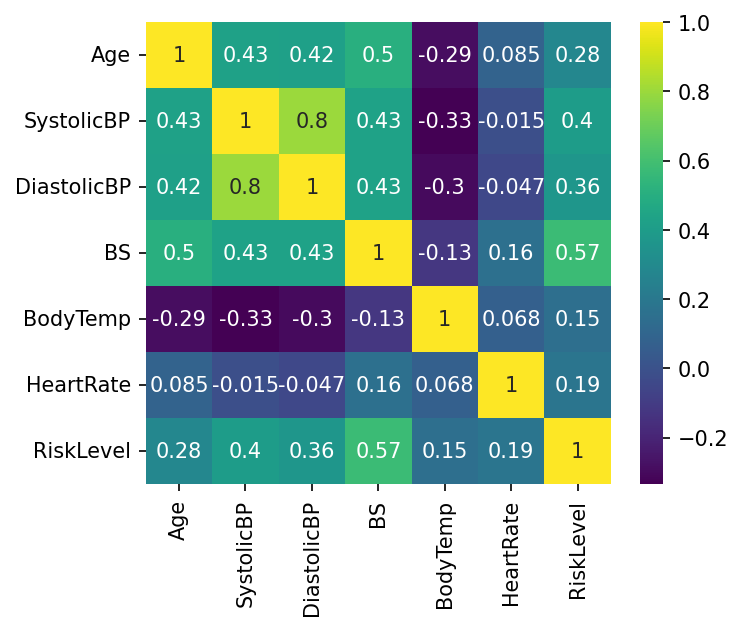

In [23]:
plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.savefig('corr.png')
plt.show()

In [12]:
X=df.drop(['RiskLevel'],axis=1)
y=df['RiskLevel']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_


best_rf.fit(X, y)


y_pred = best_rf.predict(X)  


accuracy = accuracy_score(y, y_pred)
print(" Random Forest Accuracy: {:.2f}%".format(accuracy * 100))


#print("Best Hyperparameters:", best_params)

Tuned Random Forest Accuracy: 93.19%
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Random Forest Accuracy on Test Set: 94.26%


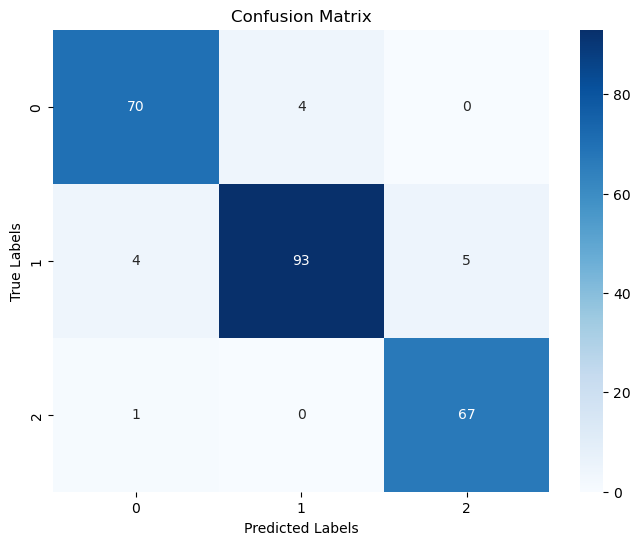

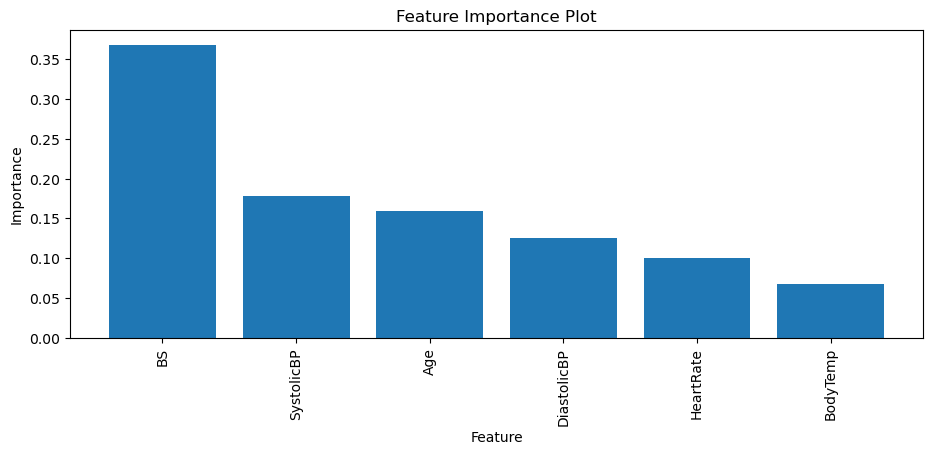

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (previous code)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the Random Forest model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Plot
feature_importances = best_rf.feature_importances_
feature_names = X.columns  # Replace with your actual feature names

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(11, 4))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# ... (previous code)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

best_rf.fit(X, y)

y_pred = best_rf.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')

print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))
print("Random Forest Precision: {:.2f}".format(precision))
print("Random Forest Recall: {:.2f}".format(recall))

# Additional: Print classification report
report = classification_report(y, y_pred)
print('Classification Report:\n', report)


Random Forest Accuracy: 93.19%
Random Forest Precision: 0.93
Random Forest Recall: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       406
           1       0.91      0.91      0.91       406
           2       0.93      0.99      0.96       406

    accuracy                           0.93      1218
   macro avg       0.93      0.93      0.93      1218
weighted avg       0.93      0.93      0.93      1218



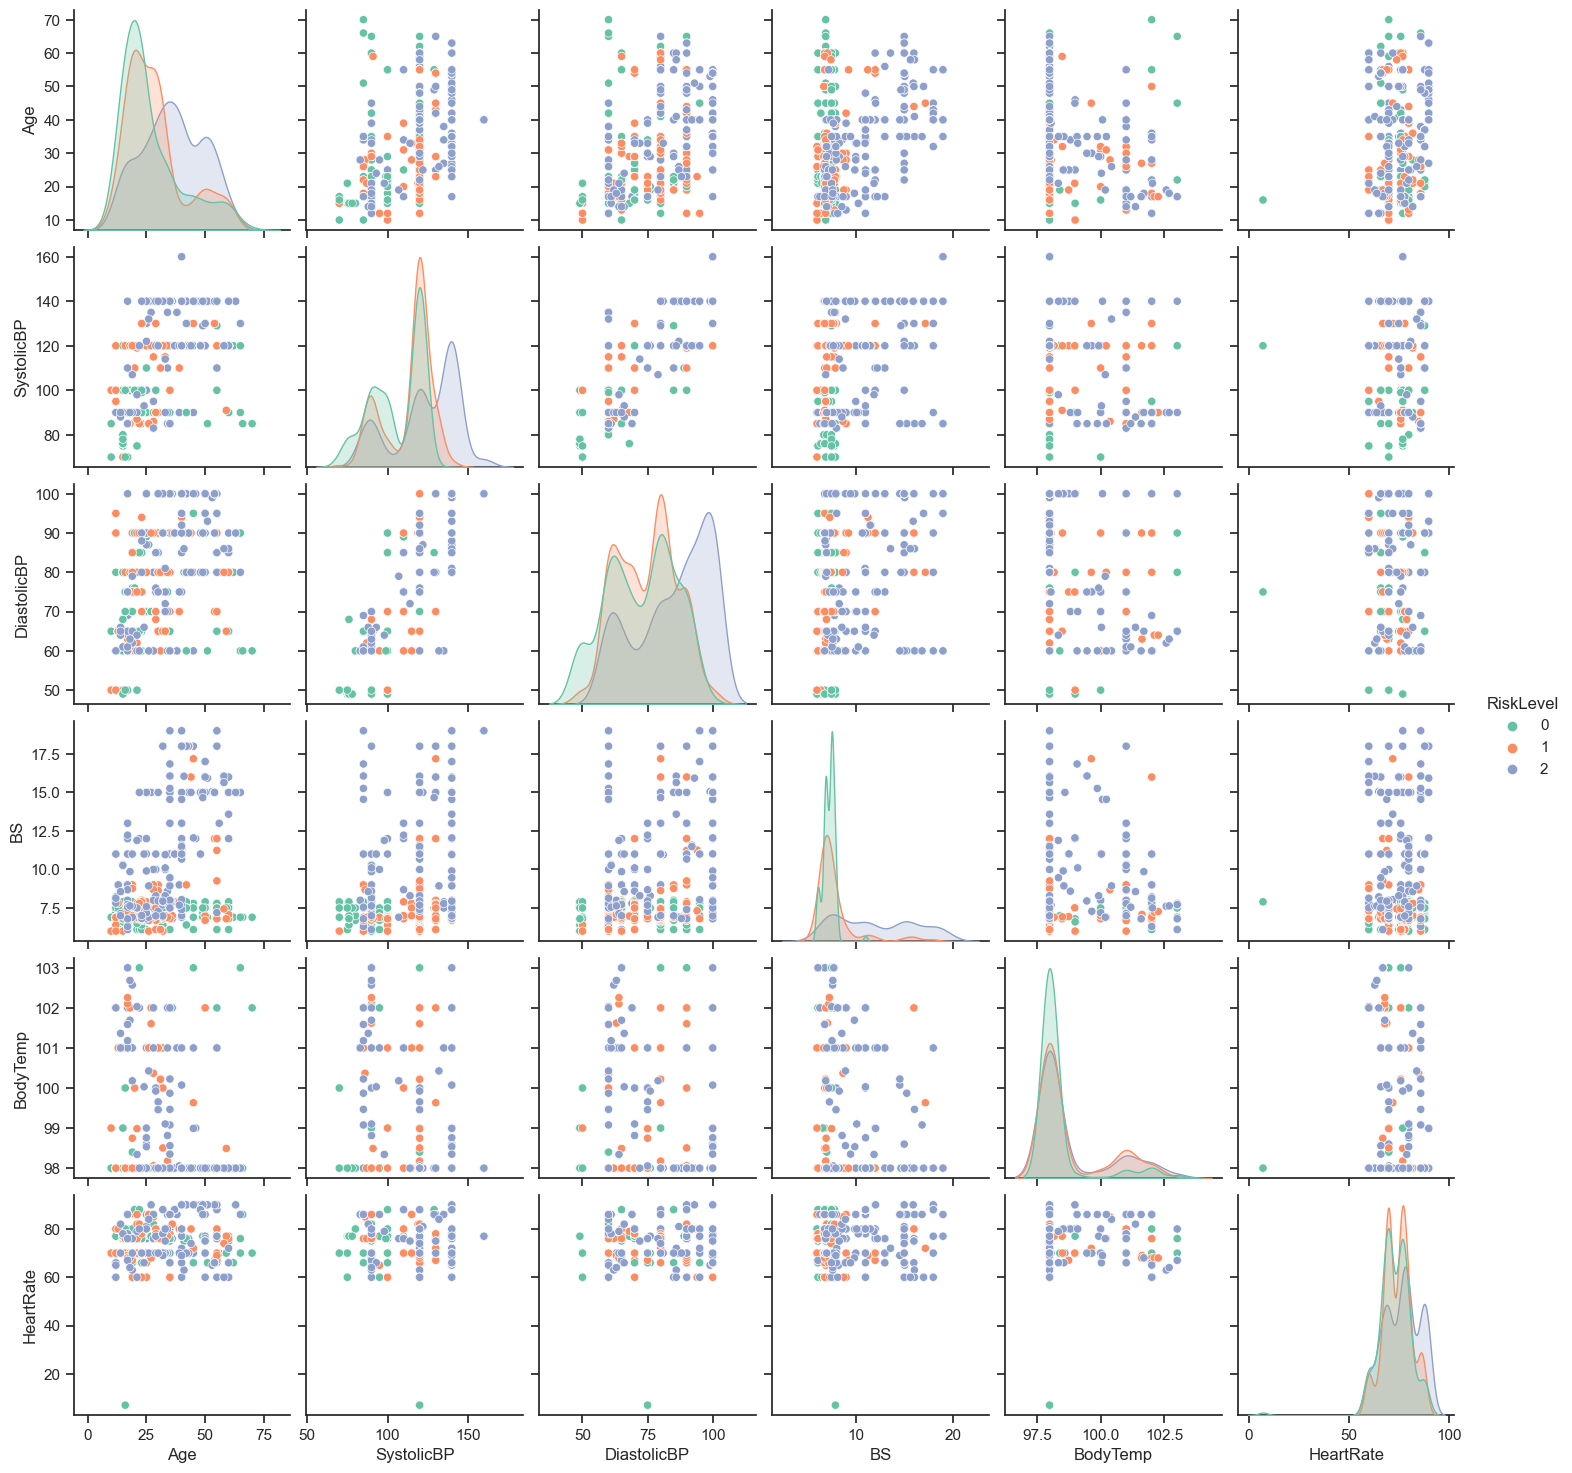

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace "Set2" with the desired color palette
# You can also create your own custom palette, e.g., sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"])

sns.set(style="ticks")
sns.pairplot(df, hue="RiskLevel", palette="Set2")
plt.show()
